# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [6]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import math
import numpy as np
import keras
import sklearn

print("tensorflow version:", tf.__version__)
print("keras version:", keras.__version__)
print("sklearn version:", sklearn.__version__)
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("seaborn version:", sns.__version__)


tensorflow version: 2.19.0
keras version: 3.9.1
sklearn version: 1.6.0
numpy version: 1.26.4
pandas version: 2.2.2
seaborn version: 0.13.2


In [7]:
# Import essential libraries
import os
import zipfile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
import random




Load the dataset.

In [8]:
# ZIP file path
dataset_path=os.getcwd()
extract_path=os.getcwd()


In [9]:
# define the path to the zip file 
zip_file_path=os.path.join(dataset_path, 'data.zip')

#Unzip the dataset
with zipfile.PyZipFile(zip_file_path, 'r') as zip_reference :
     zip_reference.extractall(extract_path)

print(f"DataSet extracted to : {zip_file_path}")

DataSet extracted to : d:\DataScience\ML1\CNN\Assignment\final\data.zip


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [10]:
# # Create a function to load the raw images

def load_images_from_directory(directory, target_size=(128, 128)):

    images = []
    labels = []
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            for file in os.listdir(label_path):
                file_path = os.path.join(label_path, file)
                try:
                    with Image.open(file_path) as img:
                        img = img.resize(target_size)
                        images.append(np.array(img))
                        labels.append(label)
                except Exception as e:
                    print(f"Error laoding image {file_path}: {e}")
    return images, labels

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [11]:
dataset_directory = r"D:\DataScience\ML1\CNN\Assignment\final\data"
#images, labels = load_images_from_directory(dataset_directory)

images, labels = load_images_from_directory(dataset_directory)
print(f"Loaded {len(images)} images with {len(set(labels))} unique labels.")

Loaded 7625 images with 7 unique labels.


Verfy the shapes of images and labels

In [12]:
#Verfy the shapes of images and labels
print(f"Number of images: {len(images)}")
print(f"Number of images: {len(labels)}")
print(f"shae of images: {images[0].shape}")
print(f"Unique lablels : {set(labels)}")


Number of images: 7625
Number of images: 7625
shae of images: (128, 128, 3)
Unique lablels : {'Cardboard', 'Food_Waste', 'Metal', 'Paper', 'Plastic', 'Other', 'Glass'}


Images and labels loaded acuurately with size of 7625 and acuurate shape

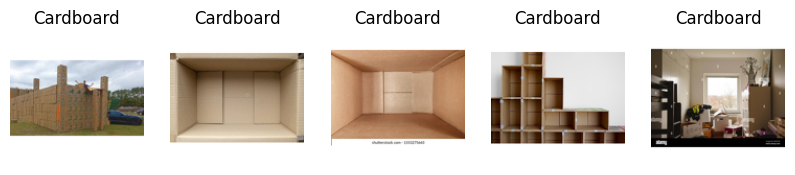

In [13]:
#Verify few sample images with their labels
plt.figure(figsize=(10, 5))
for i in range(5) :
    plt.subplot(1,5,i+1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')
plt.show()

Perform any operations, if needed, on the images and labels to get them into the desired format.

In [14]:
#Normalise the images to the range [0,1]
images= np.array(images) / 255.0

# Converts labels to numpy array 
labels = np.array(labels)

print(f"Images shape : {images.shape}")
print(f"labels shape : {labels.shape}")


Images shape : (7625, 128, 128, 3)
labels shape : (7625,)


### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

C:\Users\z610908\AppData\Local\Temp\ipykernel_38072\452478768.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(lables_count.keys()), y=list(lables_count.values()),palette="viridis")


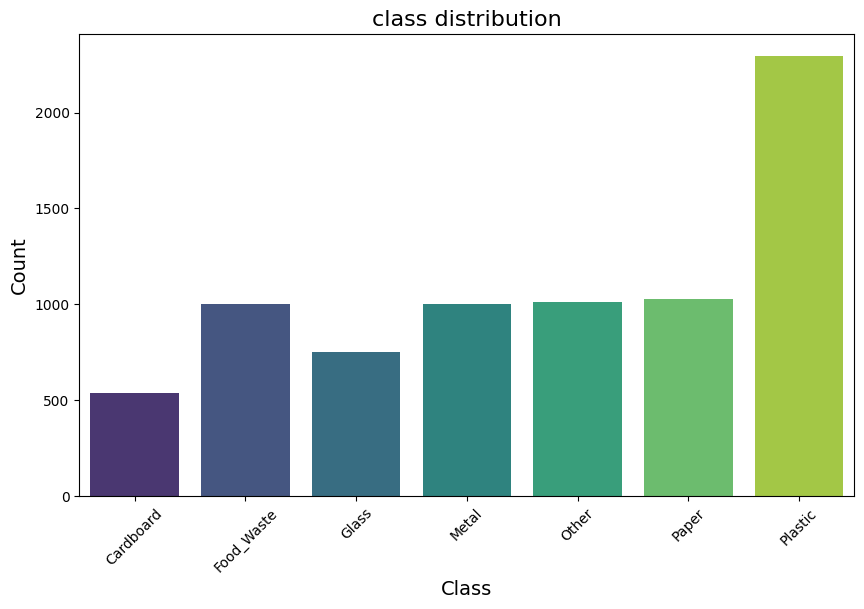

In [15]:
# Visualise Data Distribution

#Count the occurences of each label
lables_count = Counter(labels)

#plot the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(lables_count.keys()), y=list(lables_count.values()),palette="viridis")
plt.title("class distribution", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()




Dataset having heighest plastic records

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

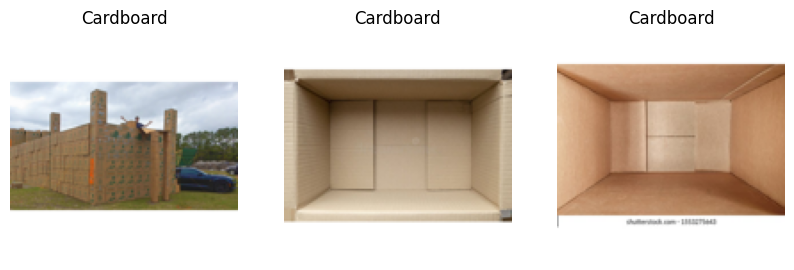

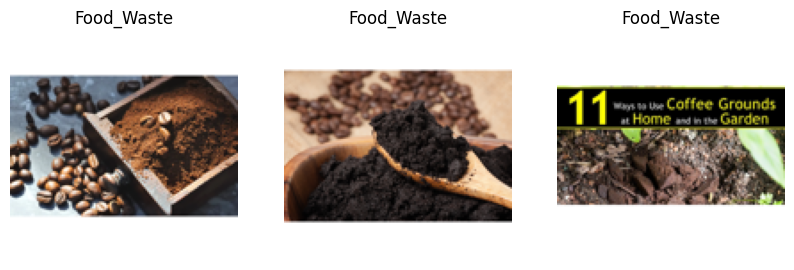

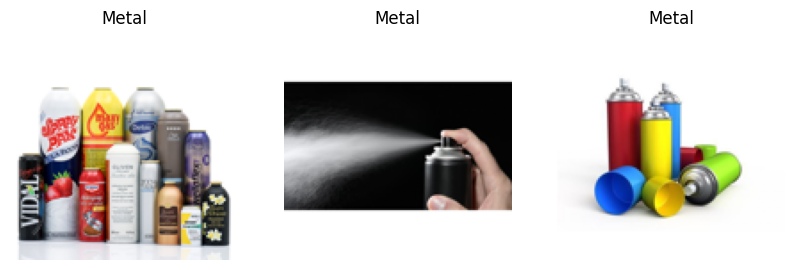

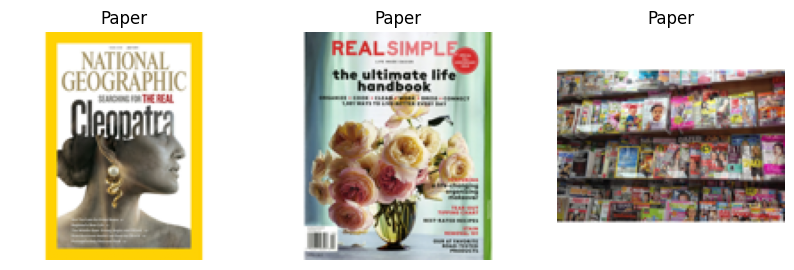

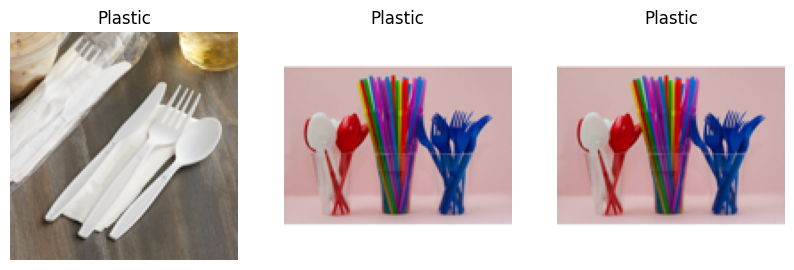

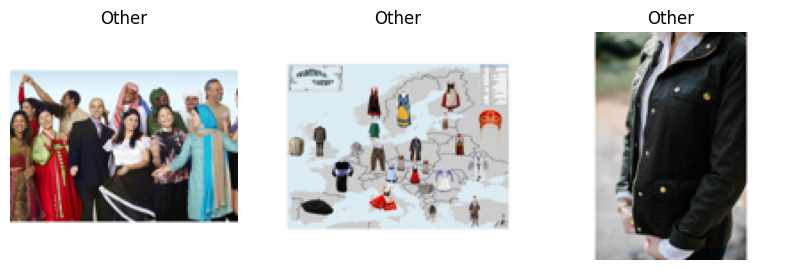

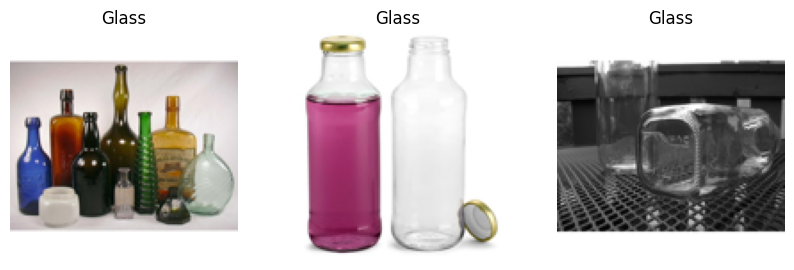

In [16]:
# Visualise Sample Images (across different labels)
def display_images_by_class(images, labels, classes, num_images=5):
    for cls in classes:
        indices=[i for i,label in enumerate(labels) if label == cls]
        selected_indices = indices[:num_images]

        plt.figure(figsize=(10, 3))
        for i, idx in enumerate(selected_indices):
            plt.subplot(1,num_images, i+1)
            plt.imshow(images[idx])
            plt.title(cls)
            plt.axis('off')
        plt.show()

#get unique classes from lables
unique_classes = list(set(labels))

#Dispaly 5 images from each class

display_images_by_class(images, labels, unique_classes, num_images=3)


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [17]:
# Find the smallest and largest image dimensions from the data set
image_shapes = [img.shape for img in images]
min_dimensions = np.min(image_shapes, axis=0)
max_dimensions = np.max(image_shapes, axis=0)

print(f"Minimum image diemwnsions: {min_dimensions}")
print(f"Maximum image diementions: {max_dimensions}")



Minimum image diemwnsions: [128 128   3]
Maximum image diementions: [128 128   3]


In [18]:
# Resize the image dimensions

#images are having apropriate dimensions

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [19]:
# Encode the labels suitably

label_encouder = LabelEncoder()
encoded_labels = label_encouder.fit_transform(labels)

#Display the mapping of encoded values
class_mapping = dict(zip(label_encouder.classes_, range(len(label_encouder.classes_))))
print(f"class mapping: {class_mapping}")


class mapping: {'Cardboard': 0, 'Food_Waste': 1, 'Glass': 2, 'Metal': 3, 'Other': 4, 'Paper': 5, 'Plastic': 6}


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [20]:
# Assign specified parts of the dataset to train and validation sets

X_train, X_val, y_train, y_val = train_test_split(images, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels)
X_train = np.array(X_train)
X_val = np.array(X_val) 
y_train = np.array(y_train)
y_val = np.array(y_val)
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")

Training set size: 6100
Validation set size: 1525


In [21]:
# Convert class vectors to binary class matrices.
#y_train = tf.keras.utils.to_categorical(y_train, 7)
#y_val = tf.keras.utils.to_categorical(y_val, 7)

## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [22]:
# Build and compile the model

model= Sequential([
    # 1st Conv Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128,128,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
     layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # 2nd Conv Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # 3rd Conv Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Flatten and Fully Connected Layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(len(np.unique(y_train)), activation='softmax')
]

)

# # Compile the model
# model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accurqacy'])
# model.summary()
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',  # use categorical_crossentropy if labels are one-hot
              metrics=['accuracy'])
model.summary()


c:\Users\z610908\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 31, 31, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             

 Total params: 360,487 (1.38 MB)

 Trainable params: 358,567 (1.37 MB)

 Non-trainable params: 1,920 (7.50 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [43]:
# Training
# history = model.fit(
#     X_train, y_train,
#     epochs=50,
#     batch_size=32,
#     validation_data=(X_val, y_val),
#     callbacks=[
#         EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
#     ]
# )
history= model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val), callbacks=[EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)])
# model.fit(X_train, y_train, batch_size=32,
#            epochs=10, 
#           validation_data=(X_val, y_val),
#           callbacks=[EarlyStopping(patience=3, restore_best_weights=True)])

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 39s 205ms/step - accuracy: 0.7317 - loss: 0.7453 - val_accuracy: 0.6236 - val_loss: 1.1759
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 39s 205ms/step - accuracy: 0.7499 - loss: 0.7076 - val_accuracy: 0.4951 - val_loss: 1.7939
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 39s 206ms/step - accuracy: 0.7544 - loss: 0.6980 - val_accuracy: 0.6361 - val_loss: 1.2000
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 39s 206ms/step - accuracy: 0.7598 - loss: 0.6702 - val_accuracy: 0.5259 - val_loss: 1.6901


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [44]:
# Evaluate on the test set; display suitable metrics
loss,acuuracy=model.evaluate(X_val, y_val, verbose=1)
print(f"losse:{loss}")
print(f"acuuracy:{acuuracy} ")


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6159 - loss: 1.1644
losse:1.1758958101272583
acuuracy:0.6236065626144409 


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
Classification Report:               precision    recall  f1-score   support

   Cardboard       0.75      0.73      0.74       108
  Food_Waste       0.88      0.50      0.64       200
       Glass       0.61      0.71      0.66       150
       Metal       0.46      0.73      0.56       200
       Other       0.53      0.33      0.40       202
       Paper       0.62      0.52      0.57       206
     Plastic       0.68      0.75      0.71       459

    accuracy                           0.62      1525
   macro avg       0.65      0.61      0.61      1525
weighted avg       0.65      0.62      0.62      1525



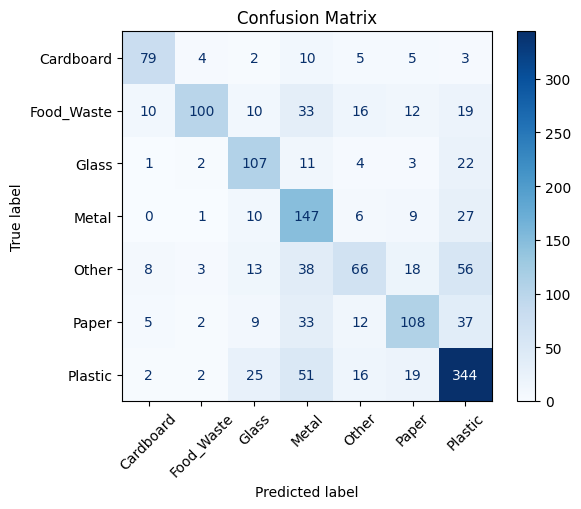

In [46]:
# Classification report as per assignment requirenment
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_val
calssification_report = classification_report(y_true, y_pred, target_names=label_encouder.classes_)
print(f"Classification Report: {calssification_report}")

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encouder.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

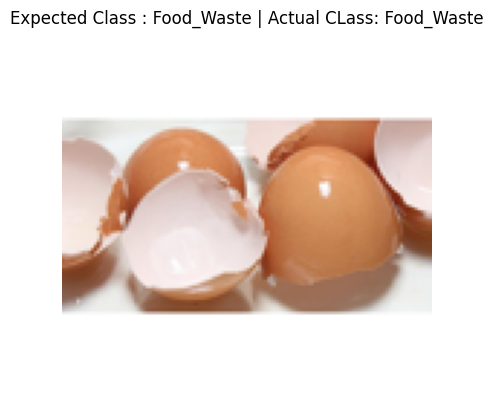

Prediction:
Cardboard: 0.08
Food_Waste: 0.83
Glass: 0.01
Metal: 0.00
Other: 0.07
Paper: 0.01
Plastic: 0.00


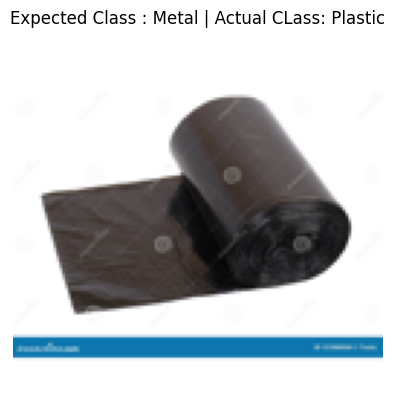

Prediction:
Cardboard: 0.00
Food_Waste: 0.01
Glass: 0.00
Metal: 0.71
Other: 0.15
Paper: 0.01
Plastic: 0.12


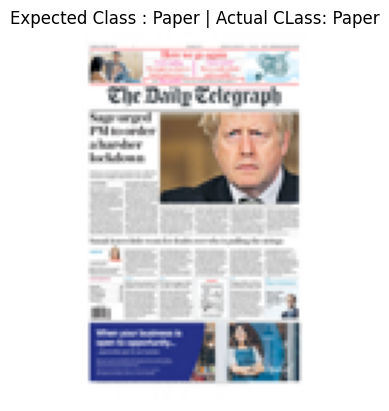

Prediction:
Cardboard: 0.01
Food_Waste: 0.01
Glass: 0.01
Metal: 0.11
Other: 0.01
Paper: 0.82
Plastic: 0.02


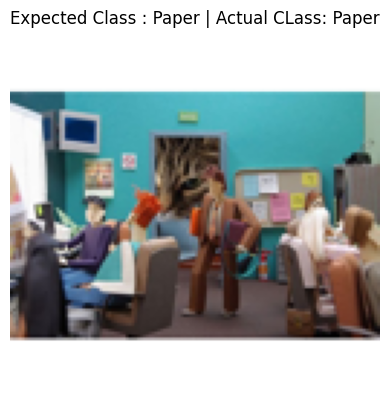

Prediction:
Cardboard: 0.01
Food_Waste: 0.01
Glass: 0.00
Metal: 0.46
Other: 0.01
Paper: 0.49
Plastic: 0.03


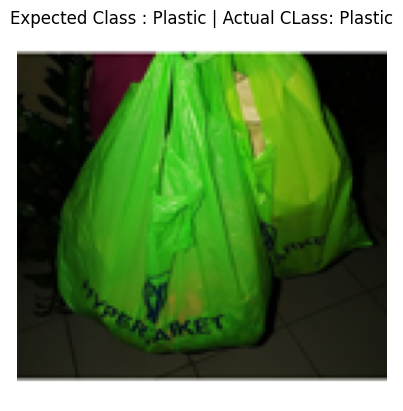

Prediction:
Cardboard: 0.00
Food_Waste: 0.13
Glass: 0.31
Metal: 0.00
Other: 0.00
Paper: 0.00
Plastic: 0.56


In [45]:
# For sample image predicting their labels using the trained model just for curiosity testing the model.
def predict_image(model, X_val, y_val, label_encoder, num_samples=3):
    indices = random.sample(range(len(X_val)), num_samples)

    for i in indices:
        test_image = X_val[i]
        sample_label = y_val[i]
        input_tensor = np.expand_dims(test_image, axis=0)

        prediction = model.predict(input_tensor, verbose=0)
        predicted_index = np.argmax(prediction[0])
        predicted_class = label_encoder.classes_[predicted_index]
        actual_class = label_encoder.classes_[sample_label]

        plt.imshow((test_image * 255).astype("uint8"))
        plt.title(f"Expected Class : {predicted_class} | Actual CLass: {actual_class}")
        plt.axis("off")
        plt.show()
        print("Prediction:")
        for j, prob in enumerate(prediction[0]):
            print(f"{label_encoder.classes_[j]}: {prob:.2f}")
        

predict_image(model, X_val, y_val, label_encouder, num_samples=5)

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [26]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [27]:
# Create a function to augment the images




In [28]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [29]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results


*Data set having paltic data heigh.
*Model reached test accuracy 62.3%
*Plastic having heigh support anf f1-score of 0.71
*Cardboard have heigh recall 0.73
